In [109]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
%matplotlib inline

In [110]:
train = pd.read_csv('bike_sharing/train.csv')
test = pd.read_csv('bike_sharing/test.csv')

In [111]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


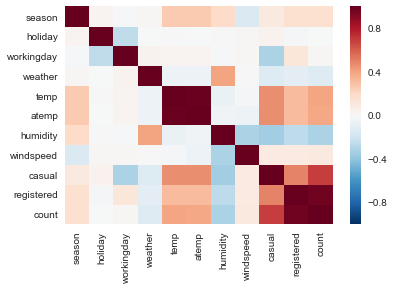

In [112]:
sns.heatmap(train.corr())

In [113]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [114]:
train.skew()

season       -0.007076
holiday       5.660517
workingday   -0.776163
weather       1.243484
temp          0.003691
atemp        -0.102560
humidity     -0.086335
windspeed     0.588767
casual        2.495748
registered    1.524805
count         1.242066
dtype: float64

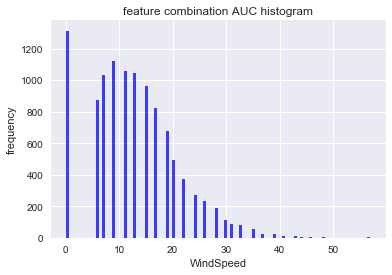

In [115]:
plt.figure(); plt.hist(train.windspeed, 100, facecolor='blue', alpha=0.75)
plt.xlabel('WindSpeed'); plt.ylabel('frequency'); plt.title('feature combination AUC histogram'); plt.show()

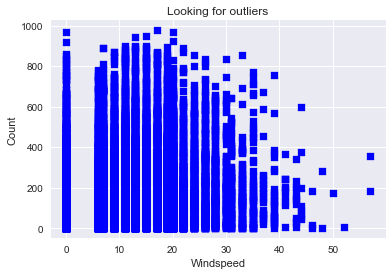

In [116]:
# train.ix[(train.windspeed>40) ]
plt.scatter(train["windspeed"], train["count"], c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("Windspeed")
plt.ylabel("Count")
plt.show()
# print(train["count"].size)

In [ ]:
# use box plats after failing to infer from histogram

















In [117]:
labels = train["count"]
# train.drop(train["count"],axis=1)
train = train.drop(['count'],axis=1)
print(train.columns)
print(labels.shape)

Index([u'datetime', u'season', u'holiday', u'workingday', u'weather', u'temp',
       u'atemp', u'humidity', u'windspeed', u'casual', u'registered'],
      dtype='object')
(10886,)


In [118]:
from datetime import datetime
def hour_from_time(time):
        datetime_object = datetime.strptime(time, '%Y-%m-%d %H:%M:%S')
#         print(datetime_object.hour)
        return int(datetime_object.hour)
train['hour'] = train['datetime'].apply(hour_from_time)
print(train['hour'].unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [119]:
from datetime import datetime
def month_from_time(time):
        datetime_object = datetime.strptime(time, '%Y-%m-%d %H:%M:%S')
#         print(datetime_object.month)
        return int(datetime_object.month)
train['month'] = train['datetime'].apply(month_from_time)
print(train['month'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [120]:
def day_of_week(time):
        datetime_object = datetime.strptime(time, '%Y-%m-%d %H:%M:%S')
#         print(datetime_object.hour)
        return int(datetime_object.weekday())
train['day'] = train['datetime'].apply(day_of_week)
print(train['day'].unique())

[5 6 0 1 2 3 4]


In [121]:
train = train.drop(['datetime','casual','registered'],axis=1)

In [122]:
print(train.columns)

Index([u'season', u'holiday', u'workingday', u'weather', u'temp', u'atemp',
       u'humidity', u'windspeed', u'hour', u'month', u'day'],
      dtype='object')


In [ ]:
# convert some of numerical data to categorical 



















In [123]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=3, random_state=0)
regr.fit(train, labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [124]:
print(test.columns)

Index([u'datetime', u'season', u'holiday', u'workingday', u'weather', u'temp',
       u'atemp', u'humidity', u'windspeed'],
      dtype='object')


In [125]:
test['hour'] = test['datetime'].apply(hour_from_time)
print(test['hour'].unique())
test['day'] = test['datetime'].apply(day_of_week)
print(test['day'].unique())
test['month'] = test['datetime'].apply(month_from_time)
print(test['month'].unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[3 4 5 6 0 1 2]
[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [126]:
print(test.columns)

Index([u'datetime', u'season', u'holiday', u'workingday', u'weather', u'temp',
       u'atemp', u'humidity', u'windspeed', u'hour', u'day', u'month'],
      dtype='object')


In [127]:
test_datetime = test["datetime"]
test = test.drop(['datetime'],axis=1)
print(test.columns)

Index([u'season', u'holiday', u'workingday', u'weather', u'temp', u'atemp',
       u'humidity', u'windspeed', u'hour', u'day', u'month'],
      dtype='object')


In [128]:
test_labels = regr.predict(test)
test["count"] = test_labels
test["datetime"] = test_datetime

In [129]:
test_results = test[['datetime','count']]
file_name = "submission.csv"
test_results.to_csv(file_name, encoding='utf-8', index=False)
print(test_results)

                 datetime       count
0     2011-01-20 00:00:00   44.061823
1     2011-01-20 01:00:00   28.557220
2     2011-01-20 02:00:00   17.087622
3     2011-01-20 03:00:00   17.087622
4     2011-01-20 04:00:00   17.087622
5     2011-01-20 05:00:00   17.087622
6     2011-01-20 06:00:00  101.429619
7     2011-01-20 07:00:00  187.876165
8     2011-01-20 08:00:00  187.876165
9     2011-01-20 09:00:00  187.876165
10    2011-01-20 10:00:00  187.876165
11    2011-01-20 11:00:00  187.876165
12    2011-01-20 12:00:00  187.876165
13    2011-01-20 13:00:00  187.876165
14    2011-01-20 14:00:00  187.876165
15    2011-01-20 15:00:00  187.876165
16    2011-01-20 16:00:00  187.876165
17    2011-01-20 17:00:00  187.876165
18    2011-01-20 18:00:00  187.876165
19    2011-01-20 19:00:00  187.876165
20    2011-01-20 20:00:00  121.267792
21    2011-01-20 21:00:00  121.267792
22    2011-01-20 22:00:00  121.267792
23    2011-01-20 23:00:00  121.267792
24    2011-01-21 00:00:00   44.061823
25    2011-0